In [113]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob 
from keras.models import model_from_json

from evaluate.lane import LaneEval
import cv2
import json
import time


# Load Models

In [2]:
json_file = open("lanes_CNN_model.json", "r")
json_model = json_file.read()
json_file.close()
lanes_model = model_from_json(json_model)
lanes_model.load_weights("lanes_CNN_model.h5")
print("Lane Model loaded")
lanes_model.summary()


Lane Model loaded
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 80, 160, 3)        12        
_________________________________________________________________
Conv1 (Conv2D)               (None, 78, 158, 60)       1680      
_________________________________________________________________
Conv2 (Conv2D)               (None, 76, 156, 50)       27050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 78, 50)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 36, 76, 40)        18040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 76, 40)        0         
_________________________________________________________________
Conv4 (Conv2D)               (None, 34, 74, 30)        108

In [3]:
### LOAD HERE POLYNOMIAL MODEL

In [116]:
def _maskThresh(channel, low_limit=0, high_limit=255):
    """Takes single channel, outputs binary image"""
    s_binary=np.zeros_like(S_channel, dtype=np.uint8)
    s_binary[(S_channel>=low_limit) & (S_channel<=high_limit)]=1
    return s_binary

def denormalize(evaluation):
    """Inverse of normalization from model"""
    #Get channel from model
    chan=evaluation[0]
    #Normalize 0-1, get in range 255
    normalizer=np.max(chan)
    chan=255*chan/normalizer
    chan=np.uint8(chan)
    zeros=np.zeros_like(chan)
    augmented=255*_toBinaryThresh(chan, 25,255)
    image=cv2.merge((zeros, augmented, zeros))
    #image=cv2.merge((zeros, chan, zeros))
    return image

def road_lanes(image):
    """Takes road Image, rezises for model, predicts
    Returns Green lane markings, overlapped image,
    elapsed time"""
    t1=time.time()
    img=image
    #Preprocess
    img = cv2.resize(img, None,fx=0.125, fy=0.125)
    scaled_size=np.zeros_like(img)
    img=img[10:,:,:]
    img[:11,:,:]=0
    #Conditioning for model
    small_img=np.asarray(img)
    small_img=np.float32(small_img)
    small_img = small_img[None,:,:,:]
    #Get prediction
    prediction=lanes_model.predict(small_img)
    mask=denormalize(prediction)
    
    total_time=time.time()-t1
    
    
    return img, mask, overlay, total_time
    
    

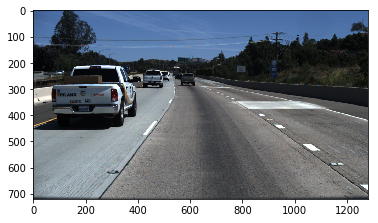

uint8


In [103]:
img=mpimg.imread("train_set/clips/0531/1492626287507231547/20.jpg")

plt.imshow(img)
plt.show()
print(img.dtype)

In [117]:
original, predicted, result, elapsed =road_lanes(img)
print(elapsed)
image=denormalize(result)
plt.imshow(image)


NameError: name 'overlay' is not defined